In [1]:
# Importing LIbraries
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, BatchNormalization
from keras.layers import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img

from PIL import Image
import cv2
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.python.ops import math_ops
from tensorflow.python.util.tf_export import tf_export
FAST_RUN = False
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNELS = 1# RGB color
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)

C:\Users\prash\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
#Lets take a look at our directory
import os,shutil
print(os.listdir("../Python Lab/10_categories"))

['airplanes', 'BACKGROUND_Google', 'bonsai', 'car_side', 'Faces', 'Faces_easy', 'grand_piano', 'Leopards', 'Motorbikes', 'watch']


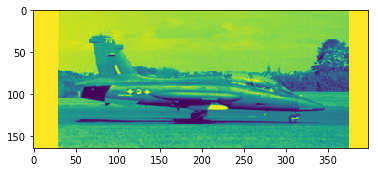

In [5]:
import cv2
import numpy
import glob
import pylab as plt
path = 'E:/Insofe/Python Lab/10_cat_output/'
folders = glob.glob('E:\\Insofe\\Python Lab\\10_categories\\*')
categories = []
count = 0
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
            imagenames_list.append(f)
            
            
read_images = []        
X = []

for image in imagenames_list:
    read_images.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))
    image_array = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(image_array, (IMAGE_SIZE))
    new_array= new_array.reshape(128,128,1)


    X.append(new_array)
    im = image.split('\\')[5]
    category = image.split('\\')[4]
    #write_name = category + '_' + im
    #cv2.imwrite(path + write_name, img)
    if category == 'airplanes':
        categories.append(0)
    elif category == 'BACKGROUND_Google':
        categories.append(1)
    elif category == 'bonsai':
        categories.append(2)
    elif category == 'car_side':
        categories.append(3)
    elif category == 'Faces':
        categories.append(4)
    elif category == 'Faces_easy':
        categories.append(5)
    elif category == 'grand_piano':
        categories.append(6)
    elif category == 'Leopards':
        categories.append(7)
    elif category == 'Motorbikes':
        categories.append(8)
    elif category == 'watch':
        categories. append(9)
    else:
        pass

    

plt.imshow(read_images[0])

  


In [6]:
y = categories
X = np.array(X)
y = np.array(y)


In [7]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
X_train = X / 255.0
Y_train = to_categorical(y, num_classes = 10)

In [8]:
print(X_train.shape, Y_train.shape)

(3724, 128, 128, 1) (3724, 10)


In [9]:
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras import backend as K
import keras
import matplotlib.pyplot as plt
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(128,128,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(10, activation = (tf.nn.softmax)))
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
__________

In [ ]:
model.fit(x=X_train,
          y=Y_train, epochs=50, validation_split=0.1)

Train on 3351 samples, validate on 373 samples
Epoch 1/50
3351/3351 [==============================] - 1482s 442ms/step - loss: 4.2985 - acc: 0.6577 - val_loss: 11.2874 - val_acc: 0.2922
Epoch 2/50
3351/3351 [==============================] - 1671s 499ms/step - loss: 1.8288 - acc: 0.8424 - val_loss: 10.5898 - val_acc: 0.3378
Epoch 3/50
1152/3351 [=========>....................] - ETA: 17:34 - loss: 1.1767 - acc: 0.9028